# **Importing the Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [21]:
cd /content/gdrive/MyDrive/Machine_Learning/Colab Notebooks/ML_Practicals/1_Practical/P6_KNN

/content/gdrive/MyDrive/Machine_Learning/Colab Notebooks/ML_Practicals/1_Practical/P6_KNN


In [60]:
ls

haberman.csv  KNN.ipynb  Surgical_deepnet.csv


# **Importing the Dataset**

In [61]:
dataset = pd.read_csv('haberman.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [62]:
dataset

,Age,Axillry Nodes(+ve),Survival
0,30,1,1
1,30,3,1
2,30,0,1
3,31,2,1
4,31,4,1
...,...,...,...
301,75,1,1
302,76,0,1
303,77,3,1
304,78,1,0


## Splitting the dataset into the Training set and Test set

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [80]:
print(X_train)

[[41  0]
 [70  4]
 [62  0]
 [55  3]
 [38  0]
 [52  0]
 [65  0]
 [39  0]
 [50  1]
 [54  7]
 [61  8]
 [52  5]
 [55 15]
 [58  0]
 [70  0]
 [58  3]
 [55 22]
 [51  3]
 [63  0]
 [44  0]
 [52  1]
 [60  1]
 [62  6]
 [56  3]
 [70 14]
 [41  0]
 [52  3]
 [64 22]
 [57  9]
 [53 12]
 [54 11]
 [57  0]
 [42  0]
 [67  0]
 [37  0]
 [54  0]
 [44 16]
 [54  7]
 [42  1]
 [43  0]
 [74  0]
 [64  0]
 [59  0]
 [72  0]
 [55  1]
 [60  2]
 [55  1]
 [54 23]
 [38  5]
 [45  0]
 [59  1]
 [59  0]
 [49  0]
 [51 13]
 [70  0]
 [48  8]
 [36  1]
 [44 19]
 [48  7]
 [67  8]
 [61  0]
 [31  4]
 [47 23]
 [54  0]
 [42  1]
 [43  2]
 [52  0]
 [58  3]
 [53 24]
 [69  0]
 [40  2]
 [63 28]
 [34  0]
 [48 11]
 [59  4]
 [31  2]
 [53  0]
 [50  0]
 [38 21]
 [38  0]
 [44  1]
 [69  0]
 [58  0]
 [37  0]
 [65 22]
 [72  3]
 [66  1]
 [45  6]
 [41  0]
 [30  0]
 [63  0]
 [47  4]
 [56  9]
 [45  0]
 [34  1]
 [61  0]
 [42  4]
 [40  0]
 [35 13]
 [52  0]
 [41  8]
 [59  3]
 [63  1]
 [65  2]
 [49  1]
 [73  0]
 [43 52]
 [57 14]
 [61  0]
 [50  1]
 [59  0]
 

In [81]:
print(y_train)

[1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1
 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [82]:
print(X_test)

[[67  1]
 [43 14]
 [65  0]
 [58  1]
 [53  9]
 [37 15]
 [60  0]
 [46 20]
 [66 13]
 [63  0]
 [73  0]
 [50  0]
 [52  4]
 [64  0]
 [62 13]
 [61  0]
 [42 20]
 [46  2]
 [54  0]
 [35  0]
 [38  0]
 [53  3]
 [61  0]
 [34  7]
 [47 12]
 [46  3]
 [55  1]
 [51  1]
 [43  2]
 [48  2]
 [57  0]
 [63  0]
 [44  9]
 [53  4]
 [43  0]
 [57  1]
 [61  0]
 [42  0]
 [60 17]
 [36  0]
 [50 13]
 [34  9]
 [50  0]
 [58  2]
 [41  0]
 [47  0]
 [70  0]
 [83  2]
 [50  0]
 [33 10]
 [42  0]
 [49  0]
 [50  4]
 [39  0]
 [63  0]
 [52  0]
 [37  6]
 [49  1]
 [34  0]
 [41  0]
 [45  0]
 [65  1]
 [64  0]
 [50  1]
 [44  6]
 [67  0]
 [53  1]
 [47  0]
 [53  2]
 [60 25]
 [74  3]
 [70  8]
 [47  3]
 [62 19]
 [38  1]
 [48 11]
 [37  0]]


## Feature Scaling

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #avoid data leakage

In [84]:
print(X_train)

[[-1.09229448 -0.53827882]
 [ 1.61641636 -0.00810312]
 [ 0.86918578 -0.53827882]
 [ 0.21535903 -0.14064705]
 [-1.37250594 -0.53827882]
 [-0.06485244 -0.53827882]
 [ 1.14939725 -0.53827882]
 [-1.27910212 -0.53827882]
 [-0.25166008 -0.40573489]
 [ 0.12195521  0.38952865]
 [ 0.77578196  0.52207257]
 [-0.06485244  0.1244408 ]
 [ 0.21535903  1.44988004]
 [ 0.4955705  -0.53827882]
 [ 1.61641636 -0.53827882]
 [ 0.4955705  -0.14064705]
 [ 0.21535903  2.3776875 ]
 [-0.15825626 -0.14064705]
 [ 0.96258961 -0.53827882]
 [-0.81208301 -0.53827882]
 [-0.06485244 -0.40573489]
 [ 0.68237814 -0.40573489]
 [ 0.86918578  0.25698473]
 [ 0.30876285 -0.14064705]
 [ 1.61641636  1.31733611]
 [-1.09229448 -0.53827882]
 [-0.06485244 -0.14064705]
 [ 1.05599343  2.3776875 ]
 [ 0.40216667  0.6546165 ]
 [ 0.02855139  1.05224827]
 [ 0.12195521  0.91970434]
 [ 0.40216667 -0.53827882]
 [-0.99889065 -0.53827882]
 [ 1.33620489 -0.53827882]
 [-1.46590976 -0.53827882]
 [ 0.12195521 -0.53827882]
 [-0.81208301  1.58242396]
 

In [85]:
print(X_test.dtype)

float64


## Training the K-NN model on the Training set

In [86]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[]#calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get first k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neighbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions


In [87]:
model=KNN(5) #our model
model.fit(X_train,y_train)

5


In [88]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [89]:
y_pred = classifier.predict(X_test)
predictions=model.predict(X_test)#our model's predictions

## Making the Confusion Matrix to compare both models

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 8 23]
 [ 5 41]]


0.6363636363636364

In [91]:
cm = confusion_matrix(y_test, predictions) #our model
print(cm)
accuracy_score(y_test, predictions)

[[ 8 23]
 [ 3 43]]


0.6623376623376623

## Visualising the Test set results 

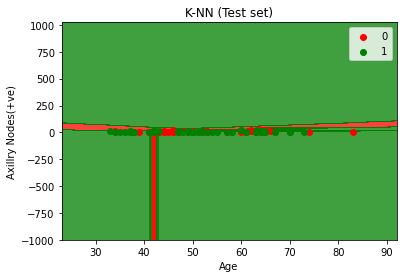

In [92]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Axillry Nodes(+ve)')
plt.legend()
plt.show()